## bow 기반의 카운터 vector 생성

In [30]:
import pandas as pd

df = pd.read_csv("C:/Users/ahyeo/OneDrive/문서/바탕 화면/Project2024/TextMining/practice/Crawling/data/naver_news_data.csv", encoding = 'cp949')
df

,topic,title,content,link
0,기후,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",(KT&G 제공) (서울=뉴스1) 이상학 기자 = KT&G(033780)는 글로벌 ...,https://n.news.naver.com/mnews/article/421/000...
1,기후,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...,https://n.news.naver.com/mnews/article/277/000...
2,기후,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",[서울=뉴시스] 강수윤 기자 = 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 ...,https://n.news.naver.com/mnews/article/003/001...
3,기후,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 (CG) [연합뉴스TV 제공] (전주=연합뉴스) 정경재 기자 ...,https://n.news.naver.com/mnews/article/001/001...
4,기후,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...,https://n.news.naver.com/mnews/article/030/000...
...,...,...,...,...
574,탄소중립,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...,https://n.news.naver.com/mnews/article/023/000...
575,탄소중립,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...,https://n.news.naver.com/mnews/article/015/000...
576,탄소중립,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...,https://n.news.naver.com/mnews/article/374/000...
577,탄소중립,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 [파이낸셜뉴스] 국내 ...,https://n.news.naver.com/mnews/article/014/000...


In [31]:
import re

title = df['title']
content = df['content']

def clean_text(text):
    return re.sub(r'\(.*?\)|\[.*?\]|=', '', text)

df['ctitle'] = df['title'].apply(clean_text)
df['ccontent'] = df['content'].apply(clean_text)

df

,topic,title,content,link,ctitle,ccontent
0,기후,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",(KT&G 제공) (서울=뉴스1) 이상학 기자 = KT&G(033780)는 글로벌 ...,https://n.news.naver.com/mnews/article/421/000...,"KT&G, CDP 기후변화 대응?수자원 관리 부문 우수기업 선정",이상학 기자 KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·...
1,기후,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...,https://n.news.naver.com/mnews/article/277/000...,"환경장관, WHO 서태평양 사무처장과 기후변화 대응 논의",환경보건 분야 교류·협력 방안 논의 한화진 환경부 장관이 30일 서울 종로구 정부서...
2,기후,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",[서울=뉴시스] 강수윤 기자 = 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 ...,https://n.news.naver.com/mnews/article/003/001...,"삼성액티브자산 ""글로벌기후테크인프라 상장 후 14% 수익""",강수윤 기자 삼성액티브자산운용은 저탄소 에너지와 전력 인프라에 집중 투자하는 K...
3,기후,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 (CG) [연합뉴스TV 제공] (전주=연합뉴스) 정경재 기자 ...,https://n.news.naver.com/mnews/article/001/001...,"농진청 ""과학기술 보급으로 농촌 현장 애로·기후변화 등 대응""",농촌진흥청 연구·개발 정경재 기자 농촌진흥청은 농업·농촌 현장에 과학기술 보...
4,기후,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...,https://n.news.naver.com/mnews/article/030/000...,"송철한 GIST 교수, '초미세먼지, 기후변화 그리고 탄소중립' 발간",송철한 GIST 교수의 '과학을 기반으로 살펴보는 초미세먼지 기후변화 그리고 탄소중...
...,...,...,...,...,...,...
574,탄소중립,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...,https://n.news.naver.com/mnews/article/023/000...,"“2050년 탄소중립, 원전 비중 45%까지 늘려야”",에너지정보문화재단 보고서 2050년 탄소 중립 달성을 위해선 현재 30% 수준인 원...
575,탄소중립,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...,https://n.news.naver.com/mnews/article/015/000...,최종 관문 넘은 유럽판 IRA…원조 IRA 대항마 될 수 있을까,EU 입법 절차 최종 문턱 넘어 이 기사는 국내 최대 해외 투자정보 플랫폼 한경 글...
576,탄소중립,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...,https://n.news.naver.com/mnews/article/374/000...,탄소중립포인트로 가스비 내세요…텀블러 쓰면 카페 주인도 15만원,집에서 에너지 사용량을 줄이면 받을 수 있는 '탄소중립포인트'로 도시가스 요금을 낼...
577,탄소중립,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 [파이낸셜뉴스] 국내 ...,https://n.news.naver.com/mnews/article/014/000...,"""2050 탄소중립 달성하려면 전기사용 증가폭 2배 증가""",대한상의 탄소중립 대응 및 전력수요 조사 대한상공회의소 제공 국내 제조기업들이 '...


#### ※ title로는 많은 특성을 추출하지 못하고, topic의 수도 1~2개로 제한되기 때문에 content로 수행한다.

In [67]:
content = df['ccontent'].tolist()
print("기사의 개수 : ", len(content))
print("#첫번째 기사의 제목 : ", content[0])

기사의 개수 :  579
#첫번째 기사의 제목 :    이상학 기자  KT&G는 글로벌 환경정보 평가기관인 CDP로부터 기후변화 대응·수자원 관리 부문 우수기업으로 선정됐다고 19일 밝혔다. KT&G는 지난해에 이어 기후변화 대응·수자원 관리 두 분야 모두에서 Leadership에 해당하는 상위 등급을 획득했다. 특히 수자원 관리 부문의 경우 지난해 Leadership A-에서 최고등급인 A로 한 단계 상승했으며, 전 세계 수상기업 100개 중 국내에서는 3개 기업 만 A등급을 받았다. 기후변화 대응 부문은 지난해와 동일한 Leadership A-등급을 유지했다. KT&G는 2021년 중장기 환경경영 비전인 '2030 Green Impact'를 수립하고, 가치사슬 전체의 탄소중립 달성을 위한 ESG경영을 실천하고 있다. 지구온도의 상승폭을 1.5도 이내로 제한하는데 기여하는 온실가스 감축 목표를 세우고, 2022년 기준연도 대비 국내외 사업장의 온실가스 배출량을 7.5% 감축하는 성과를 거뒀다. 또 공급망의 온실가스 배출량에 대해서는 제3자 검증을 받아 데이터의 신뢰도와 객관성도 강화했다. 수자원 관리 부문에서는 2030년까지 국내외 제조 사업장에서 사용하는 물의 양을 2020년 대비 20% 절감하는 목표를 수립해 실행에 옮기고 있다. CDP는 영국에서 2000년에 설립된 비영리 단체로, 전 세계 2만3000여개 기업에 환경 관련 경영정보 공개를 요청하고, 이에 대한 정보 분석과 평가를 수행하고 있다. KT&G 관계자는 "글로벌 스탠더드에 발맞춘 기후변화 대응과 체계적인 수자원 관리 역량을 인정받아 CDP로부터 우수기업에 선정됐다"며 "향후에도 순환경제 전환 가속화에 앞장서는 등 진정성 있는 ESG경영을 추진할 것"이라고 말했다.


In [68]:
##countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

content_cv = CountVectorizer(max_features = 2000)
content_DTM = content_cv.fit_transform(content)

print(content_cv.get_feature_names_out()[:100])

['02' '10' '100' '100년' '10년' '10년간' '10월' '11' '11월' '11일' '12' '1234'
 '12월' '12일' '13' '13일' '14' '14일' '15' '158명으로' '15일' '16' '16일' '17'
 '17일' '18' '18일' '19' '1973년' '1980년대' '19일' '19일부터' '1년' '1도' '1만' '1월'
 '1위' '1인' '1일' '1차' '1호' '20' '2015년' '2018년' '2019년' '2020년' '2021년'
 '2022년' '2023' '2023년' '2024' '2024년' '2027년' '2030년' '2030년까지' '2050'
 '2050년' '2050년까지' '20년' '20도' '21일' '22' '22대' '22일' '23일' '24시간' '24일'
 '25' '27일' '29' '29일' '2년' '2년간' '2도' '2배' '2월' '2일' '2차' '30' '30년'
 '31개' '33' '3개' '3년' '3도' '3배' '3분의' '3월' '3일' '40' '4444' '47' '4개' '4년'
 '4도' '4월' '4일' '4호선' '50' '5개']


#### 분석 사항
위의 결과를 보았을 때, 어간이 동일한 단어들이 많이 발견된다. 이는 같은 단어로 보아야 하기 떄문에 KoNLPy 형태소 분석기를 사용한다.

In [69]:
from konlpy.tag import Okt

twit = Okt()

In [70]:
import itertools

morphs_results = []

for sent in content :
    sent_cont = twit.morphs(sent)
    morphs_results.append(sent_cont)

#1차원으로 펴는 <평탄화> 작업 수행
# morphs_results_flatten = list(itertools.chain.from_iterable(morphs_results))

print("#토큰의 수 : ",  len(morphs_results))
print("#앞 100개의 토큰")
print(morphs_results[:100])

#토큰의 수 :  579
#앞 100개의 토큰
[['이상', '학', '기자', 'KT', '&', 'G', '는', '글로벌', '환경', '정보', '평가', '기관', '인', 'CDP', '로부터', '기후변화', '대응', '·', '수자원', '관리', '부문', '우수', '기업', '으로', '선정', '됐다고', '19일', '밝혔다', '.', 'KT', '&', 'G', '는', '지난해', '에', '이어', '기후변화', '대응', '·', '수자원', '관리', '두', '분야', '모두', '에서', 'Leadership', '에', '해당', '하는', '상위', '등급', '을', '획득', '했다', '.', '특히', '수자원', '관리', '부문', '의', '경우', '지난해', 'Leadership', 'A', '-', '에서', '최고', '등급', '인', 'A', '로', '한', '단계', '상승', '했으며', ',', '전', '세계', '수상', '기업', '100', '개', '중', '국내', '에서는', '3', '개', '기업', '만', 'A', '등급', '을', '받았다', '.', '기후변화', '대응', '부문', '은', '지난해', '와', '동일한', 'Leadership', 'A', '-', '등급', '을', '유지', '했다', '.', 'KT', '&', 'G', '는', '2021년', '중', '장기', '환경', '경영', '비전인', "'", '2030', 'Green', 'Impact', "'", '를', '수립', '하고', ',', '가치', '사슬', '전체', '의', '탄소', '중립', '달성', '을', '위', '한', 'ESG', '경영', '을', '실천', '하고', '있다', '.', '지', '구', '온도', '의', '상승', '폭', '을', '1.5', '도', '이내', '로', '제한', '하는데', '기여', '하는', '온실가스', '

In [71]:
#명사만 추출
noun_results = []

# 형태소 분석을 수행하여 명사 추출
for sent in content:
    sent_nouns = twit.nouns(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    noun_results.append(processed_nouns)

# noun_results_flatten = list(itertools.chain.from_iterable(noun_results))

print("#토큰의 수 : ",  len(noun_results))
print("#앞 100개의 토큰")
print(noun_results[:100])

#토큰의 수 :  579
#앞 100개의 토큰
[['이상', '학', '기자', '글로벌', '환경', '정보', '평가', '기관', '로부터', '기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '지난해', '기후변화', '대응', '수자원', '관리', '두', '분야', '모두', '해당', '상위', '등급', '획득', '수자원', '관리', '부문', '경우', '지난해', '최고', '등급', '로', '단계', '상승', '전', '세계', '수상', '기업', '개', '중', '국내', '개', '기업', '만', '등급', '기후변화', '대응', '부문', '지난해', '등급', '유지', '중', '장기', '환경', '경영', '를', '수립', '가치', '사슬', '전체', '탄소 중립', '달성', '위', '경영', '실천', '온도', '상승', '폭', '도', '이내', '제한', '기여', '온실가스', '감축', '목표', '기준', '연도', '대비', '국내외', '사업', '온실가스', '배출량', '감축', '성과', '또', '공급망', '온실가스', '배출량', '대해', '제', '자', '검증', '데이터', '신뢰', '도', '객관성', '수자원', '관리', '부문', '국내외', '제조', '사업', '사용', '물의', '양', '대비', '절감', '목표', '수립', '실행', '영국', '설립', '비영리', '단체', '전', '세계', '여개', '기업', '환경', '관련', '경영정보', '공개', '요청', '이', '대한', '정보', '분석', '평가', '수행', '관계자', '글로벌', '스탠더드', '발', '기후변화', '대응', '체계', '수자원', '관리', '역량', '로부터', '우수', '기업', '선정', '며', '향후', '순환', '경제', '전환', '가속', '등', '진정', '경영', '추진', '것', 

In [72]:
#명사만 추출
pos_results = []

# 형태소 분석을 수행하여 명사 추출
for sent in content:
    sent_nouns = twit.pos(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    pos_results.append(processed_nouns)

# pos_results_flatten = list(itertools.chain.from_iterable(pos_results))

print("#토큰의 수 : ",  len(pos_results))
print("#앞 100개의 토큰")
print(pos_results[:100])

#토큰의 수 :  579
#앞 100개의 토큰
[[('이상', 'Noun'), ('학', 'Noun'), ('기자', 'Noun'), ('KT', 'Alpha'), ('&', 'Punctuation'), ('G', 'Alpha'), ('는', 'Verb'), ('글로벌', 'Noun'), ('환경', 'Noun'), ('정보', 'Noun'), ('평가', 'Noun'), ('기관', 'Noun'), ('인', 'Josa'), ('CDP', 'Alpha'), ('로부터', 'Noun'), ('기후변화', 'Noun'), ('대응', 'Noun'), ('·', 'Punctuation'), ('수자원', 'Noun'), ('관리', 'Noun'), ('부문', 'Noun'), ('우수', 'Noun'), ('기업', 'Noun'), ('으로', 'Josa'), ('선정', 'Noun'), ('됐다고', 'Verb'), ('19일', 'Number'), ('밝혔다', 'Verb'), ('.', 'Punctuation'), ('KT', 'Alpha'), ('&', 'Punctuation'), ('G', 'Alpha'), ('는', 'Verb'), ('지난해', 'Noun'), ('에', 'Josa'), ('이어', 'Verb'), ('기후변화', 'Noun'), ('대응', 'Noun'), ('·', 'Punctuation'), ('수자원', 'Noun'), ('관리', 'Noun'), ('두', 'Noun'), ('분야', 'Noun'), ('모두', 'Noun'), ('에서', 'Josa'), ('Leadership', 'Alpha'), ('에', 'Josa'), ('해당', 'Noun'), ('하는', 'Verb'), ('상위', 'Noun'), ('등급', 'Noun'), ('을', 'Josa'), ('획득', 'Noun'), ('했다', 'Verb'), ('.', 'Punctuation'), ('특히', 'Adverb'), ('수자원', 'Noun'), ('

In [73]:
print("#전체 형태소 결과 : ", morphs_results[1])
print("#명사만 추출 : ", noun_results[1])
print("#품사 태깅 결과 : ", pos_results[1])

#전체 형태소 결과 :  ['환경', '보건', '분야', '교류', '·', '협력', '방안', '논의', '한화', '진', '환경부', '장관', '이', '30일', '서울', '종로구', '정부', '서울', '청사', '에서', '열린', '국무회의', '에', '참석', '하고', '있다', '.', '사진', '윤동주', '기자', 'doso', '7', '@', '한화', '진', '환경부', '장관', '은', '19일', '세계보건기구', '서', '태평양', '지역', '사무', '처', '장', '과', '만나', '서', '태평양', '지역', '의', '기후변화', '에', '대응', '하는', '환경', '보건', '분야', '의', '교류', '와', '협력', '방안', '을', '논의', '했다', '.', '이', '달', '취임', '한', '사이', '아', '마', '우', '피우', '칼라', '서', '태평양', '지역', '사무', '처', '장', '은', '태평양', '도서', '국가', '인', '통가', '출신', '으로', '보건부', '장관', ',', '국회의원', '등', '을', '역임', '한', '바', '있다', '.', '환경부', '는', '2010년', '부터', '아시아', '지역', '환경', '보건', '정책', '공유', ',', '협력', '체계', '구축', '등', '을', '위해', '서', '태평양', '지역', '사무', '처', '와', '양해각서', '를', '체결', '하고', '협력', '사업', '을', '지원', '하고', '있다', '.', '이', '날', '양자', '면담', '을', '계기', '로', '양', '기관', '은', '서', '태평양', '지역', '의', '기후변화', '대응', '력', '을', '높이', '고', '환경', '보건', '위해', '요소', '관리', '구축', '을', '위', '한', '협력', '을', '강화하는

In [74]:
## 명사, 동사, 형용사만 선택하여 형태소를 지정한다.

results = []

def my_tokenizer(doc):
    return [
        token
        for token, pos in twit.pos(doc)
        if pos in ['Noun', 'Verb', 'Adjective']
    ]

# 형태소 분석을 수행하여 명사 추출
for sent in content:
    sent_nouns = my_tokenizer(sent)
    # "탄소 중립"을 하나의 단어로 처리하기 위한 후처리
    processed_nouns = []
    skip_next = False
    for i in range(len(sent_nouns)):
        if skip_next:
            skip_next = False
            continue
        if sent_nouns[i] == "탄소" and i+1 < len(sent_nouns) and sent_nouns[i+1] == "중립":
            processed_nouns.append("탄소 중립")
            skip_next = True  # 다음 단어 ("중립") 건너뛰기
        else:
            processed_nouns.append(sent_nouns[i])
    results.append(processed_nouns)

print("나만의 토크나이저 결과(1)", results[1])
print("나만의 토크나이저 결과(2)", results[2])
print("나만의 토크나이저 결과(3)", results[3])

나만의 토크나이저 결과(1) ['환경', '보건', '분야', '교류', '협력', '방안', '논의', '한화', '진', '환경부', '장관', '서울', '종로구', '정부', '서울', '청사', '열린', '국무회의', '참석', '있다', '사진', '윤동주', '기자', '한화', '진', '환경부', '장관', '세계보건기구', '태평양', '지역', '사무', '처', '만나', '태평양', '지역', '기후변화', '대응', '하는', '환경', '보건', '분야', '교류', '협력', '방안', '논의', '했다', '달', '취임', '사이', '마', '피우', '칼라', '태평양', '지역', '사무', '처', '태평양', '도서', '국가', '통가', '출신', '보건부', '장관', '국회의원', '등', '역임', '바', '있다', '환경부', '아시아', '지역', '환경', '보건', '정책', '공유', '협력', '체계', '구축', '등', '위해', '태평양', '지역', '사무', '처', '양해각서', '체결', '협력', '사업', '지원', '있다', '날', '양자', '면담', '계기', '양', '기관', '태평양', '지역', '기후변화', '대응', '높이', '환경', '보건', '위해', '요소', '관리', '구축', '위', '협력', '강화하는', '한편', '가시', '성과', '도출', '할', '수', '있도록', '구체', '협력', '과제', '실행', '계획', '대해', '실무', '논의', '지속', '할', '예정', '태평양', '지역', '사무', '처', '지역', '특', '분소', '아시아', '태평양', '환경', '보건', '센터', '향후', '운영', '방향', '대해', '서도', '논의', '했다', '아시아', '태평양', '환경', '보건', '센터', '환경부', '태평양', '지역', '사무', '처', '서울시', '자', '양해각서', '체결

In [75]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(max_features=2000, tokenizer = my_tokenizer, max_df = 0.5, min_df = 5)

content_cv = vec.fit_transform(content)

print("#추출된 특성 : ", vec.get_feature_names_out()[:100])
print("#countvector 형태(shape) : ", content_cv.shape)

C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#추출된 특성 :  ['가' '가격' '가구' '가까운' '가까이' '가는' '가능' '가능성' '가능하다' '가능한' '가디언' '가량' '가루'
 '가뭄' '가상' '가속' '가스' '가운데' '가을' '가입' '가장' '가정' '가족' '가지' '가진' '가치' '각'
 '각각' '각국' '각료' '각종' '간' '간접' '갈' '갈등' '갈수록' '감' '감귤' '감소' '감시' '감염병' '감축'
 '값' '강' '강도' '강력한' '강수' '강수량' '강연' '강우' '강원' '강원도' '강조' '강한' '강화' '강화하고'
 '강화한다' '갖고' '같다' '같은' '개' '개국' '개념' '개막' '개발' '개발도상국' '개선' '개소' '개월' '개인'
 '개정' '개체' '개최' '개혁' '개화' '객' '거' '거나' '거대한' '거듭' '거래' '거리' '거의' '거점' '거주'
 '거쳐' '걱정' '건' '건강' '건기' '건립' '건물' '건설' '건축' '건축물' '걸' '걸쳐' '검사' '검색' '검역']
#countvector 형태(shape) :  (579, 2000)


In [76]:
print(repr(content_DTM))

<579x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 50246 stored elements in Compressed Sparse Row format>


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=my_tokenizer)
content_tfidf = tfidf.fit_transform(content)

C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


### 토픽 모델링

In [78]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components = 10, random_state = 42)
content_lsa = svd.fit_transform(content_tfidf)

print("LSA Converted X shape : ", content_lsa.shape)
print("Sum of explained variance ratio : {:.3f}".format(svd.explained_variance_ratio_.sum())) # 분산 비율

terms = tfidf.get_feature_names_out()
def get_topics(model, feature_names, n = 10): # 10개의 정보 추출
    for idx, topic in enumerate(model.components_):
        print("Topic %d : "%(idx + 1), # 주제 당 단어
              [feature_names[i] for i in topic.argsort()[:-n-1:-1]])

get_topics(svd, terms)

LSA Converted X shape :  (579, 10)
Sum of explained variance ratio : 0.151
Topic 1 :  ['탄소', '중립', '기후', '했다', '등', '에너지', '것', '기업', '사업', '지원']
Topic 2 :  ['탄소', '중립', '포스코', '감축', '지원', '기업', '앤', '사업', '추진', '건설']
Topic 3 :  ['카드', '동행', '서울시', '과천시', '서울', '과천', '기후', '이용', '지하철', '대중교통']
Topic 4 :  ['바이오', '등급', '직스', '평가', '리더십', '글로벌', '경영', '기업', '제약', '가능']
Topic 5 :  ['포스코', '앤', '건설', '감축', '배출', '카드', '목표', '설정', '승인', '탄소']
Topic 6 :  ['도민', '포스코', '앤', '기후', '회의', '건설', '분과', '민회', '청년', '건물']
Topic 7 :  ['맨발', '알리기', '이준석', '신당', '의원', '여의도', '개혁', '회관', '위기', '승환']
Topic 8 :  ['에너지', '원자력', '과학관', '부산', '국립', '청정', '협력', '미래', '원전', '무']
Topic 9 :  ['중립', '탄소', '성남시', '에너지', '원자력', '과학관', '아마존', '부산', '홈페이지', '시민']
Topic 10 :  ['아마존', '대서양', '순환', '북극곰', '변화', '열대우림', '빙하', '팀', '숲', '붕괴']


### Topic Modeling

1. scikit-learn
2. Gensim

#### 1. 사이킷런 LDA

In [79]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(tokenizer = my_tokenizer, max_df = 0.5, min_df = 5) #특성 추출 제한 안함

content_cv = vec.fit_transform(content)

print("#추출된 특성 : ", vec.get_feature_names_out()[:100])
print("#countvector 형태(shape) : ", content_cv.shape)

C:\Users\ahyeo\anaconda3\envs\TextMining\lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#추출된 특성 :  ['가' '가격' '가고' '가공' '가교' '가구' '가까운' '가까이' '가는' '가능' '가능성' '가능하게' '가능하다'
 '가능한' '가동' '가득' '가디언' '가라앉아' '가량' '가로등' '가루' '가면' '가뭄' '가상' '가속' '가스'
 '가시' '가열' '가운데' '가을' '가입' '가장' '가장자리' '가점' '가정' '가져올' '가족' '가중' '가지' '가진'
 '가짜' '가축' '가치' '가치나' '가하고' '가해자' '각' '각각' '각광' '각국' '각료' '각자' '각종' '각지'
 '간' '간다' '간담' '간의' '간접' '갇혀' '갈' '갈등' '갈수록' '감' '감귤' '감독' '감사' '감소' '감시'
 '감안' '감염' '감염병' '감지' '감축' '갑자기' '갑작스럽게' '값' '갔다' '강' '강도' '강력한' '강릉' '강물'
 '강소기업' '강수' '강수량' '강연' '강우' '강우량' '강원' '강원도' '강조' '강타' '강풍' '강하게' '강한'
 '강화' '강화하고' '강화하기' '강화하는']
#countvector 형태(shape) :  (579, 3872)


In [81]:
##pg 162
from sklearn.decomposition import LatentDirichletAllocation # LDA 사용
import numpy as np
np.set_printoptions(precision=3)

lda = LatentDirichletAllocation(n_components = 10, #전체 토픽의 수
                                max_iter = 5, #반복 횟수 (최소 5는 주어야함.)
                                topic_word_prior= 0.1, doc_topic_prior=1.0,
                                learning_method = 'online',
                                n_jobs= -1,  #모든 프로세서 수 사용
                                random_state = 0)

news_topics = lda.fit_transform(content_cv)
print("#shape of review_topics :", news_topics.shape) #(문서의 수, 토픽의 수)
print("#sample of review_topics :", news_topics[0]) # 9번째 topic이 0.323으로 가장 높음

gross_topic_weights = np.mean(news_topics, axis = 0)
print("Sum of topic weights of documents : ", gross_topic_weights) # 7번째 토픽이 corpus 전체에서 11.1%로 가장 많이 나타남
print("Shape of topic word distribution : ", lda.components_.shape)

#shape of review_topics : (579, 10)
#sample of review_topics : [0.828 0.019 0.066 0.011 0.008 0.009 0.012 0.02  0.007 0.02 ]
Sum of topic weights of documents :  [0.092 0.115 0.232 0.027 0.118 0.103 0.056 0.084 0.046 0.126]
Shape of topic word distribution :  (10, 3872)


In [83]:
## 토픽의 내용을 파악하기 위해 가장 비중이 높은 단어 10 ~ 20개를 확인
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d: " % topic_idx, end = '')
        print(
            ", ".join([feature_names[i] for i in topic.argsort()[:-n_top_words-1:-1]]) # 가장 비중이 높은 단어를 뒤에서 추출
        )

    print()
print_top_words(lda, vec.get_feature_names_out(), 10) #각 주제별 상위 10개 단어 추출

Topic #0: 탄소, 감축, 기업, 배출, 목표, 바이오, 글로벌, 포스코, 앤, 대응
Topic #1: 탄소, 중립, 계획, 정책, 사과, 환경, 재배, 포인트, 실천, 녹색
Topic #2: 지구, 도, 기온, 온도, 상승, 미국, 온난화, 평균, 입니다, 가장
Topic #3: 수소, 대응, 환경, 통상, 협력, 위기, 규범, 교육, 공급망, 디지털
Topic #4: 연구, 빙하, 지구, 팀, 지역, 온난화, 변화, 결과, 영향, 아마존
Topic #5: 카드, 지역, 동행, 서울, 서울시, 위기, 이용, 사업, 협약, 시민
Topic #6: 연구, 기술, 축제, 부산, 미래, 개발, 우주, 올해, 시기, 개화
Topic #7: 사업, 지원, 시설, 기술, 기업, 탄소, 추진, 중립, 설치, 검사
Topic #8: 위기, 정치, 선언, 시민, 우리, 대응, 기자, 호, 국립, 시위
Topic #9: 에너지, 탄소, 기업, 산업, 한국, 중립, 전환, 발전, 목표, 한다



n_components : 1, perplexity : 1936.157
n_components : 2, perplexity : 1637.416
n_components : 3, perplexity : 1561.389
n_components : 4, perplexity : 1503.792
n_components : 5, perplexity : 1510.605
n_components : 6, perplexity : 1514.063
n_components : 7, perplexity : 1489.369
n_components : 8, perplexity : 1477.727
n_components : 9, perplexity : 1439.350
n_components : 10, perplexity : 1444.544
n_components : 11, perplexity : 1431.334
n_components : 12, perplexity : 1414.207
n_components : 13, perplexity : 1407.554
n_components : 14, perplexity : 1399.384
n_components : 15, perplexity : 1399.793


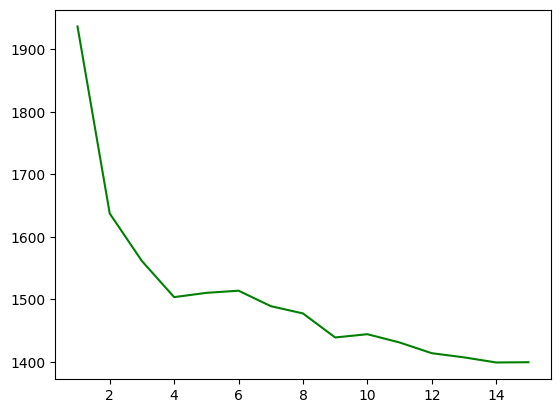

n_components with minimum perplexity :  14


In [84]:
## 최적의 토픽 수 판단하기
import matplotlib.pyplot as plt
%matplotlib inline

def show_perplexity(cv, start = 10, end = 30, max_iter = 5, topic_word_prioir = 0.1,
                    doc_topic_prioir = 1.0) :
    iter_num = []
    per_value = []

    for i in range(start, end + 1):
        lda = LatentDirichletAllocation(n_components = i,
                                max_iter = max_iter,
                                topic_word_prior= topic_word_prioir, doc_topic_prior= doc_topic_prioir,
                                learning_method = 'batch',
                                n_jobs= -1,
                                random_state = 7)
        lda.fit(cv)
        iter_num.append(i)
        pv = lda.perplexity(cv)
        per_value.append(pv)
        print(f'n_components : {i}, perplexity : {pv:0.3f}')

    plt.plot(iter_num, per_value, 'g-')
    plt.show()
    return start + per_value.index(min(per_value)) # 가장 최솟값 반환


print("n_components with minimum perplexity : ",
      show_perplexity(content_cv, start = 1, end = 15))

In [85]:
lda = LatentDirichletAllocation(n_components=8, #혼란도가 낮은 8을 topic의 수로 지정
                                max_iter = 20,
                                topic_word_prior=0.1,
                                doc_topic_prior=1.0,
                                learning_method='batch',
                                n_jobs = -1,
                                random_state = 7)

review_topics = lda.fit_transform(content_cv)

print_top_words(lda, vec.get_feature_names_out(), 10)

Topic #0: 위기, 카드, 동행, 시민, 서울, 정책, 서울시, 지역, 참여, 이용
Topic #1: 빙하, 팀, 지구, 얼음, 변화, 바다, 연구, 온난화, 결과, 축제
Topic #2: 기술, 사업, 시설, 대응, 바이오, 관리, 지원, 한다, 기후변화, 및
Topic #3: 배출, 가스, 지원, 환경, 온실가스, 감축, 친환경, 지역, 배출량, 자동차
Topic #4: 지구, 도, 기온, 온도, 상승, 평균, 지난해, 가장, 입니다, 기록
Topic #5: 지역, 피해, 아마존, 가격, 지구, 숲, 감소, 분석, 재난, 주민
Topic #6: 문제, 한다, 연구, 그, 미국, 교수, 한국, 영향, 위기, 기후변화
Topic #7: 탄소, 중립, 에너지, 기업, 감축, 사업, 지원, 목표, 추진, 산업



#### LDA 결과

통계적 분석을 통해 나온 perplexity(혼란도)는 topic의 수가 증가할 수록 혼란도가 낮아진다는 것을 알 수 있다.

하지만, 비슷한 문장이 topic으로 들어가는 것 같기 때문에 이는 추가적인 정제 과정 필요

#### 2. Gensim

In [87]:
texts = []

for sent in content:
    texts.append(my_tokenizer(sent))

print(texts)

[['이상', '학', '기자', '는', '글로벌', '환경', '정보', '평가', '기관', '로부터', '기후변화', '대응', '수자원', '관리', '부문', '우수', '기업', '선정', '됐다고', '밝혔다', '는', '지난해', '이어', '기후변화', '대응', '수자원', '관리', '두', '분야', '모두', '해당', '하는', '상위', '등급', '획득', '했다', '수자원', '관리', '부문', '경우', '지난해', '최고', '등급', '로', '한', '단계', '상승', '했으며', '전', '세계', '수상', '기업', '개', '중', '국내', '개', '기업', '만', '등급', '받았다', '기후변화', '대응', '부문', '지난해', '동일한', '등급', '유지', '했다', '는', '중', '장기', '환경', '경영', '비전인', '를', '수립', '가치', '사슬', '전체', '탄소', '중립', '달성', '위', '경영', '실천', '있다', '온도', '상승', '폭', '도', '이내', '제한', '하는데', '기여', '하는', '온실가스', '감축', '목표', '세우고', '기준', '연도', '대비', '국내외', '사업', '온실가스', '배출량', '감축', '하는', '성과', '거뒀다', '또', '공급망', '온실가스', '배출량', '대해', '서는', '제', '자', '검증', '받아', '데이터', '신뢰', '도', '객관성', '강화했다', '수자원', '관리', '부문', '국내외', '제조', '사업', '사용', '하는', '물의', '양', '대비', '절감', '하는', '목표', '수립', '해', '실행', '옮기고', '있다', '는', '영국', '설립', '된', '비영리', '단체', '전', '세계', '여개', '기업', '환경', '관련', '경영정보', '공개', '요청', '이', '대한', '정보', '분석', '평가'

In [88]:
# dictionary 생성, 필터링, 카운트 벡터 변환
from gensim.corpora.dictionary import Dictionary

dictionary = Dictionary(texts) #토큰화 결과를 dictionary로 반환
print("#Number of initial unique words in documents : ", len(dictionary))

#문서 빈도수가 너무 적거나 높은 단어 필터링 및 특성을 단어의 빈도 수로 선택
#특성 추출 : 2000개, 단어는 적어도 5개 이상, 50% 이하 출현
dictionary.filter_extremes(no_below = 5, no_above=0.5)
print("#Number of unique words after removing rare and common words : ", len(dictionary))

#카운트 벡터로 변환
corpus = [dictionary.doc2bow(text) for text in texts]
print("#Number of unique tokens : %d" %len(dictionary))
print("#Number of documents : %d" %len(corpus))

#Number of initial unique words in documents :  15972
#Number of unique words after removing rare and common words :  3872
#Number of unique tokens : 3872
#Number of documents : 579


In [89]:
from gensim.models import LdaModel

num_topics = 10 #topic의 수
passes = 5 #반복 횟수
%time model = LdaModel(corpus = corpus, id2word = dictionary,\
                        passes = passes, num_topics= num_topics,\
                        random_state = 7)

CPU times: total: 3.44 s
Wall time: 5.55 s


In [90]:
model.print_topics(num_words = 10)

[(0,
  '0.015*"카드" + 0.012*"동행" + 0.010*"기온" + 0.008*"도" + 0.008*"서울" + 0.007*"지역" + 0.007*"서울시" + 0.006*"이용" + 0.005*"지난해" + 0.005*"한파"'),
 (1,
  '0.024*"에너지" + 0.017*"탄소" + 0.009*"회의" + 0.008*"수소" + 0.008*"중립" + 0.008*"명" + 0.008*"개" + 0.007*"청정" + 0.007*"정책" + 0.006*"지구"'),
 (2,
  '0.008*"기후변화" + 0.008*"미국" + 0.007*"탄소" + 0.007*"지구" + 0.007*"지역" + 0.006*"등급" + 0.006*"아마존" + 0.006*"배출" + 0.006*"평가" + 0.006*"대응"'),
 (3,
  '0.022*"지구" + 0.010*"도" + 0.010*"상승" + 0.009*"온도" + 0.008*"온난화" + 0.008*"빙하" + 0.006*"기후변화" + 0.006*"지역" + 0.006*"연구" + 0.006*"재배"'),
 (4,
  '0.011*"지구" + 0.010*"온난화" + 0.010*"변화" + 0.010*"온도" + 0.010*"팀" + 0.009*"해양" + 0.009*"연구" + 0.008*"지역" + 0.007*"발생" + 0.007*"기온"'),
 (5,
  '0.035*"탄소" + 0.018*"중립" + 0.012*"기업" + 0.011*"사업" + 0.009*"감축" + 0.009*"지원" + 0.008*"목표" + 0.007*"환경" + 0.007*"에너지" + 0.007*"추진"'),
 (6,
  '0.023*"탄소" + 0.018*"중립" + 0.011*"지원" + 0.009*"배출" + 0.008*"농업" + 0.007*"온실가스" + 0.007*"감축" + 0.007*"사업" + 0.006*"계획" + 0.005*"기업"'),
 (7,
  '0.012*"사업" 

In [91]:
print("#topic distribution of the first document : ", model.get_document_topics(corpus)[0])

#topic distribution of the first document :  [(2, 0.4096596), (5, 0.58563256)]


In [92]:
### 혼란도 및 토픽 응집도를 이용한 최적값 선택
## 토픽 응집도
#u_mass : model, corpus 필요 (속도가 빠름)
#c_v, c_uci, cnpmi : model, texts 필요
from gensim.models import CoherenceModel

cm = CoherenceModel(model = model, corpus = corpus, coherence = "u_mass")
coherence = cm.get_coherence()
print(coherence)

-2.073085142958105


num_topics = 1, perplexity = -7.542, coherence = -1.037
num_topics = 2, perplexity = -7.570, coherence = -1.061
num_topics = 3, perplexity = -7.584, coherence = -1.519
num_topics = 4, perplexity = -7.610, coherence = -1.327
num_topics = 5, perplexity = -7.641, coherence = -1.242
num_topics = 6, perplexity = -7.653, coherence = -1.231
num_topics = 7, perplexity = -7.692, coherence = -1.409
num_topics = 8, perplexity = -7.713, coherence = -1.486
num_topics = 9, perplexity = -7.743, coherence = -1.433
num_topics = 10, perplexity = -7.778, coherence = -1.443
num_topics = 11, perplexity = -7.811, coherence = -1.442
num_topics = 12, perplexity = -7.849, coherence = -1.555
num_topics = 13, perplexity = -7.890, coherence = -1.534
num_topics = 14, perplexity = -7.933, coherence = -1.529
num_topics = 15, perplexity = -7.967, coherence = -1.431


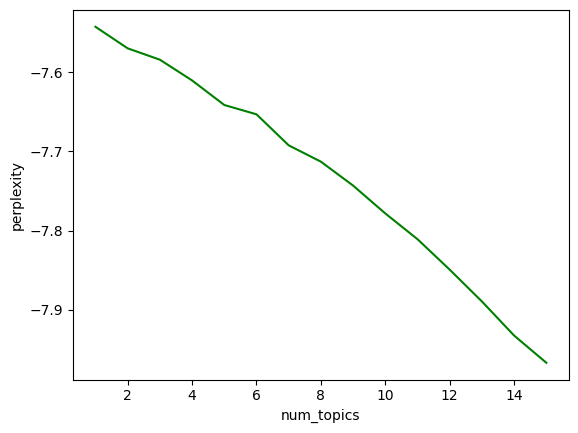

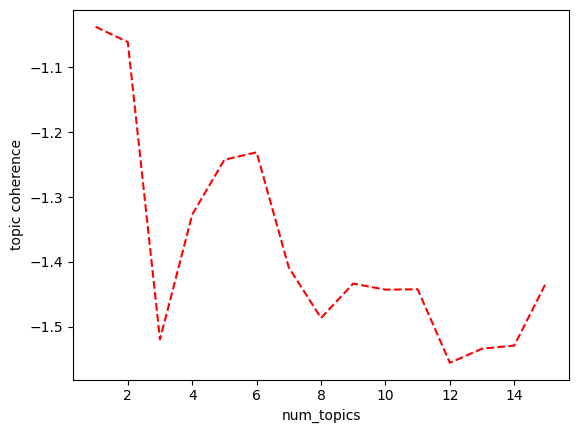

In [93]:
def show_coherence(corpus, dictionary, start = 6, end = 15):
    iter_num = [] #topic의 수
    per_value = [] #혼란도
    coh_value = [] #토픽 응집도

    for i in range(start, end + 1):
        model = LdaModel(corpus = corpus, id2word = dictionary,
                         chunksize = 1000, num_topics=i,
                         random_state = 7)
        iter_num.append(i)
        pv = model.log_perplexity(corpus)
        per_value.append(pv)

        cm = CoherenceModel(model = model, corpus = corpus, coherence = 'u_mass')
        cv = cm.get_coherence()
        coh_value.append(cv)
        print(f"num_topics = {i}, perplexity = {pv:0.3f}, coherence = {cv:0.3f}")

    plt.plot(iter_num, per_value, 'g-')
    plt.xlabel("num_topics")
    plt.ylabel("perplexity") #작을 수록 좋음
    plt.show()

    plt.plot(iter_num, coh_value, 'r--')
    plt.xlabel("num_topics")
    plt.ylabel("topic coherence") #ㄷ클 수록 좋음
    plt.show()

show_coherence(corpus, dictionary, start = 1, end = 15) #분석가가 가장 좋은 topic의 수 결정

In [94]:
# 6개의 주제가 가장 최선임 !
model.print_topics(num_words = 6)

[(0,
  '0.015*"카드" + 0.012*"동행" + 0.010*"기온" + 0.008*"도" + 0.008*"서울" + 0.007*"지역"'),
 (1,
  '0.024*"에너지" + 0.017*"탄소" + 0.009*"회의" + 0.008*"수소" + 0.008*"중립" + 0.008*"명"'),
 (2,
  '0.008*"기후변화" + 0.008*"미국" + 0.007*"탄소" + 0.007*"지구" + 0.007*"지역" + 0.006*"등급"'),
 (3,
  '0.022*"지구" + 0.010*"도" + 0.010*"상승" + 0.009*"온도" + 0.008*"온난화" + 0.008*"빙하"'),
 (4,
  '0.011*"지구" + 0.010*"온난화" + 0.010*"변화" + 0.010*"온도" + 0.010*"팀" + 0.009*"해양"'),
 (5,
  '0.035*"탄소" + 0.018*"중립" + 0.012*"기업" + 0.011*"사업" + 0.009*"감축" + 0.009*"지원"'),
 (6,
  '0.023*"탄소" + 0.018*"중립" + 0.011*"지원" + 0.009*"배출" + 0.008*"농업" + 0.007*"온실가스"'),
 (7,
  '0.012*"사업" + 0.010*"시설" + 0.010*"기술" + 0.008*"탄소" + 0.007*"분야" + 0.007*"추진"'),
 (8,
  '0.018*"위기" + 0.010*"한다" + 0.008*"대응" + 0.007*"정치" + 0.006*"가격" + 0.005*"해야"'),
 (9,
  '0.010*"에너지" + 0.007*"지역" + 0.007*"한다" + 0.006*"정책" + 0.006*"입니다" + 0.006*"관리"')]

#### 생성 날짜 가져와서 토픽 트렌드 파악하기!!

#### data가 더 필요함.